In [2]:
from distutils.command.install_egg_info import to_filename
import numpy as np
import streamlit as st
import cv2 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

In [3]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

# pretrain_path = r"C:\Users\User\Desktop\Code\Github\Final_project\WASSUP_EST_FINAL_Team4\swinv2-tiny-patch4-window8-256-finetuned-emotions\checkpoint-1509"
pretrain_path = r'C:\Users\User\Desktop\Code\Github\Final_project\swinv2-tiny-patch4-window8-256-finetuned-eurosat\checkpoint-2516'
model_trained = AutoModelForImageClassification.from_pretrained(pretrain_path)
test_img_processor = AutoImageProcessor.from_pretrained(pretrain_path)

In [4]:
from PIL import Image, ImageFont, ImageDraw



In [28]:
from transformers import pipeline

pipe = pipeline("image-classification", pretrain_path)

def img_with_text_results(img):
    
    #결과
    results = str(next(iter(pipe(Image.fromarray(img)))))
    
    # 폰트 색상 지정
    blue = (255, 0, 0)

    #한국 폰트
    kor_font = ImageFont.truetype('MaruBuri-Light.ttf', 20)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((30,40), results, blue, font=kor_font)

    img = np.array(img_pil)
    return img

# 비디오 캡처 객체 생성
cap = cv2.VideoCapture(0)

while True:
    
    # 프레임들 읽기
    ret, frame = cap.read()

    img = img_with_text_results(frame)

    # 영상 출력
    
    cv2.imshow('Real-time Video', img)

    # 'q' 키를 누르면 종
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 객체 해제
cap.release()
cv2.destroyAllWindows()

In [5]:
from ultralytics import YOLO
import torch

model_path = r"C:\Users\User\Desktop\Code\Github\Final_project\WASSUP_EST_FINAL_Team4\model.pt"
model = YOLO(model_path)

In [6]:
# results = model.predict(r'C:\Users\User\Desktop\Code\Github\Final_project\data\test\anger\0h5sfbee84a3ee8e7efdd0f578f83e4df7e491dbcdab482a480a7add89daegs3z.jpg', save=False, imgsz=320, conf=0.5)
img_path = r'C:\Users\User\Desktop\Code\Github\Final_project\data\test\anger\0h5sfbee84a3ee8e7efdd0f578f83e4df7e491dbcdab482a480a7add89daegs3z.jpg'
results = model([img_path])


0: 480x640 1 {2: 'panic'}, 90.1ms
Speed: 7.1ms preprocess, 90.1ms inference, 263.8ms postprocess per image at shape (1, 3, 480, 640)


In [5]:
# print(type(results))
# # print(results)
# print(results[0])
res_plotted = results[0].plot()
# print(results[0].boxes)

In [7]:
type(res_plotted)

numpy.ndarray

In [30]:

def img_with_text_results(img):

    
    model_path = r"C:\Users\User\Desktop\Code\Github\Final_project\WASSUP_EST_FINAL_Team4\model.pt"
    model = YOLO(model_path)
    img = cv2.resize(img, (640, 480))
    
    if torch.cuda.is_available():
      res = model.track(img, conf = 0.5, persist = True, device = 'cuda' )
    else:
      res = model.track(img, conf = 0.5, persist = True)
    
    detections = []

    for result in results:
        detection_dict = {
            'boxes': result.boxes.xyxy.cpu().numpy().tolist(),  # 바운딩 박스 좌표
            'scores': result.boxes.conf.cpu().numpy().tolist(),  # 확률
            'labels': result.boxes.cls.cpu().numpy().tolist()  # 클래스 라벨
        }
        detections.append(detection_dict)

    res_plotted = res[0].plot()
    
    return res_plotted


# 비디오 캡처 객체 생성
cap = cv2.VideoCapture(0)

while True:
    
    # 프레임들 읽기
    ret, frame = cap.read()

    
    img = img_with_text_results(frame)

    # 영상 출력
    
    cv2.imshow('Real-time Video', img)

    # 'q' 키를 누르면 종
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 객체 해제
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 6.5ms
Speed: 1.0ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.0ms
Speed: 0.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.3ms
Speed: 0.0ms preprocess, 6.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.5ms
Speed: 1.0ms preprocess, 6.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.0ms
Speed: 0.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.5ms
Speed: 0.0ms preprocess, 7.5ms inference, 0.0m

In [16]:
results = model.predict(r"C:\Users\User\Desktop\Code\Github\Final_project\data\test\anger\0h5sfbee84a3ee8e7efdd0f578f83e4df7e491dbcdab482a480a7add89daegs3z.jpg")

id2label = {
    '0' : 'Anger',
    '1' : 'Happy',
    '2' : 'Surprised',
    '3' : 'Sadness'
}

# detections = []

# for result in results:
#     detection_dict = {
#         'boxes': result.boxes.xyxy.cpu().numpy().tolist(),  # 바운딩 박스 좌표
#         'scores': result.boxes.conf.cpu().numpy().tolist(),  # 확률
#         'labels': result.boxes.cls.cpu().numpy().tolist()  # 클래스 라벨
#     }
    # detections.append(detection_dict)
orig_img = results[0].orig_img
start_point , end_point = np.array_split(results[0].boxes.xyxy.cpu().numpy().tolist()[0],2)
score = str(round(results[0].boxes.conf.cpu().numpy().tolist()[0]*100,2))+ '%'
label = id2label[str(int(results[0].boxes.cls.cpu().numpy().tolist()[0]))]


    # label = id2label[str(int(detections[0]['labels'][0]))]
    
    # result.show()
    # result.save(filename="result3.jpg")


# for detection in detections:
#     print(detection)


image 1/1 C:\Users\User\Desktop\Code\Github\Final_project\data\test\anger\0h5sfbee84a3ee8e7efdd0f578f83e4df7e491dbcdab482a480a7add89daegs3z.jpg: 480x640 1 {2: 'panic'}, 98.7ms
Speed: 3.0ms preprocess, 98.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Detection with yolo 1 stage test

In [31]:
model_path = r"C:\Users\User\Desktop\Code\Github\Final_project\WASSUP_EST_FINAL_Team4\model.pt"
model = YOLO(model_path)
res = model.track(img_path, conf=0.5)

# for result in res:
#     detection_dict = {
#         'img' : result.orig_img,
#         'boxes': result.boxes.xyxy.cpu().numpy().tolist(),  # 바운딩 박스 좌표
#         'scores': result.boxes.conf.cpu().numpy().tolist(),  # 확률
#         'labels': result.boxes.cls.cpu().numpy().tolist()  # 클래스 라벨
#     }
orig_img = res[0].orig_img
start_point , end_point = np.array_split(res[0].boxes.xyxy.cpu().numpy().tolist()[0],2)
score = str(round(res[0].boxes.conf.cpu().numpy().tolist()[0]*100,2))+ '%'
label = id2label[str(int(res[0].boxes.cls.cpu().numpy().tolist()[0]))]

# res[0].boxes.conf = str(round(res[0].boxes.conf.cpu().numpy().tolist()[0]*100,2))+ '%'
# res[0].boxes.cls = id2label[str(int(res[0].boxes.cls.cpu().numpy().tolist()[0]))]
results_str = label + ':'+ score
font = cv2.FONT_HERSHEY_SIMPLEX
blue  = (255, 0, 0)
red = (0, 0, 255)
img  = cv2.rectangle(orig_img,(int(start_point[0]), int(start_point[1])), (int(end_point[0]), int(end_point[1])), blue, 3)

img = cv2.putText(orig_img, results_str, (int(start_point[0]), int(start_point[1])) , font, 2, red, 3, cv2.LINE_AA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# res_plotted = res[0].plot()[:, :, ::-1]

Image.fromarray(img).show()
# Image.fromarray(res_plotted).show()
# Image.fromarray(res_plotted).save("result_img.jpg")


image 1/1 C:\Users\User\Desktop\Code\Github\Final_project\data\test\anger\0h5sfbee84a3ee8e7efdd0f578f83e4df7e491dbcdab482a480a7add89daegs3z.jpg: 480x640 1 {2: 'panic'}, 31.0ms
Speed: 2.0ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Testing ground


image 1/1 C:\Users\User\Desktop\Code\Github\Final_project\data\test\anger\0h5sfbee84a3ee8e7efdd0f578f83e4df7e491dbcdab482a480a7add89daegs3z.jpg: 480x640 1 {2: 'panic'}, 35.0ms
Speed: 2.0ms preprocess, 35.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
[     1338.9      373.16] [     1993.3      1282.2]


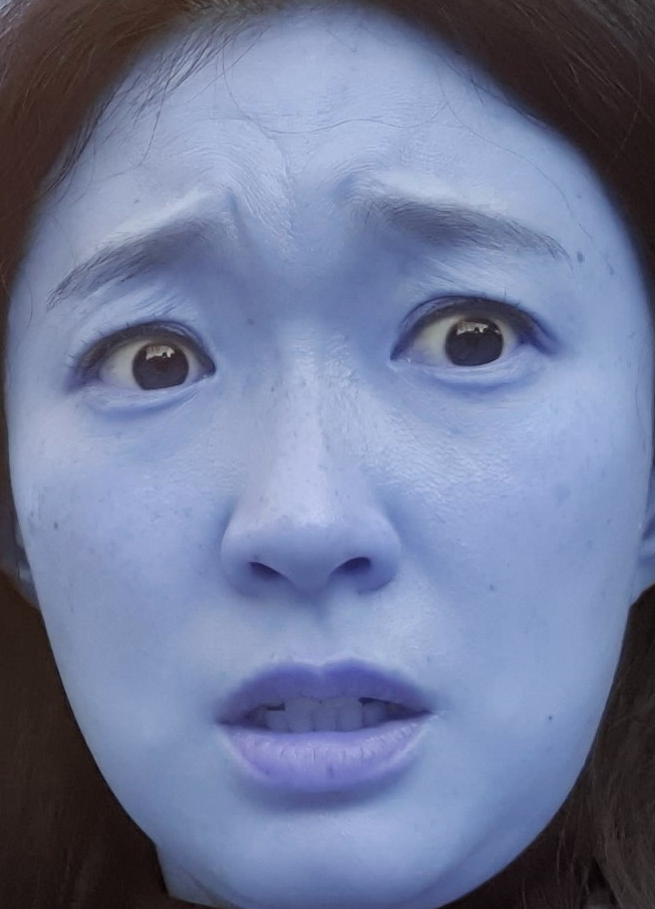

In [14]:
model_path = r"C:\Users\User\Desktop\Code\Github\Final_project\WASSUP_EST_FINAL_Team4\model.pt"
model = YOLO(model_path)
res = model.track(img_path, conf=0.5)
orig_img = res[0].orig_img
start_point , end_point = np.array_split(res[0].boxes.xyxy.cpu().numpy().tolist()[0],2)
print(start_point, end_point)
roi = orig_img[int(start_point[1]):int(end_point[1]), int(start_point[0]):int(end_point[0])]
Image.fromarray(roi)
# Image.open(orig_img[(int(start_point[0]):int(end_point[0])), (int(start_point[1]):end_point[1])])
# Image.open(orig_img[500:1000, 500:1000])

In [7]:
import os, json
from tensorflow.keras.preprocessing import image

TEST_IMG_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\data\test'
TEST_JSON_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\data\label\test'
IMG_ROWS = 256
IMG_COLS = 256

def get_json_list_1d(json_folder_path): #returns a 1 dim array
    temp_loader = []
    json_train = []
    emotion_list_json = os.listdir(json_folder_path)

    for emotion in emotion_list_json:
        with open (json_folder_path + "\\" + emotion, "r", encoding='euc-kr') as f:
            temp_loader.append(json.load(f))     

    for i in range(len(temp_loader)):
        json_train += temp_loader[i]     

    return json_train
#designed for 1D json file
def load_image_and_label_1D(json_list, img_path):
    img_file = []
    label_list = []
    
    eng_to_num = { '분노'   : '0',
                   '기쁨'   : '1',
                   '당황'   : '2',
                   '슬픔'   : '3'             
                 }
    kr_to_en = { '분노'    : 'anger',
                 '기쁨'   : 'happy',
                 '당황'   : 'panic',
                 '슬픔'   : 'sadness'             
                 }

    
    for entry in range(len(json_list)):
        try:
            label = json_list[entry]['faceExp_uploader']
            img_dir = img_path + '/' + kr_to_en[label] + '/' + json_list[entry]['filename']
            # img_dir = img_path + kr_to_en[label] + '/' + json_list[entry]['filename']
            # img = np.array(image.load_img(img_dir, target_size=(IMG_ROWS, IMG_COLS)))/255
            img = image.load_img(img_dir, target_size=(IMG_ROWS, IMG_COLS))
            img_file.append(img)
            label_list.append(int(eng_to_num[label]))
        except Exception:
            print("Emotion " + label + " " + json_list[entry]['filename'] + " Not available")
            pass

    return img_file, label_list

json_test = get_json_list_1d(TEST_JSON_PATH)


In [8]:
test_img, test_label = load_image_and_label_1D(json_test, TEST_IMG_PATH)


image 1/1 C:\Users\User\Desktop\Code\Github\Final_project\WASSUP_EST_FINAL_Team4\test.jpg: 320x640 5 {0: 'person'}s, 7.5ms
Speed: 1.0ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)


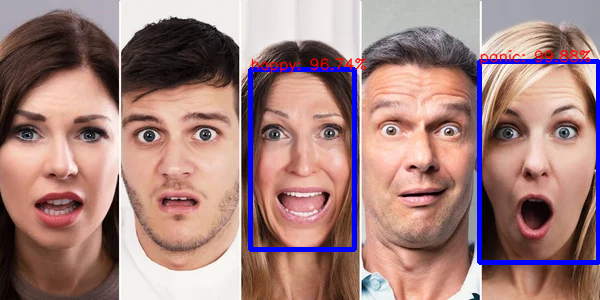

In [38]:
import numpy as np
img_path = r"C:\Users\User\Desktop\Code\Github\Final_project\WASSUP_EST_FINAL_Team4\test.jpg"
yolo_path = r"C:\Users\User\Desktop\Code\Github\Final_project\WASSUP_EST_FINAL_Team4\person_model.pt"
model = YOLO(yolo_path)

kr_to_en = { '분노'    : 'anger',
                    '기쁨'    : 'happy',
                    '당황'    : 'panic',
                    '슬픔'    : 'sadness'             
                    }

if torch.cuda.is_available():
    res = model.track(img_path, conf = 0.5, persist = True, device = 'cuda' )
else:
    res = model.track(img_path, conf = 0.5, persist = True)

orig_img = res[0].orig_img
# start_point , end_point = np.array_split(res[0].boxes.xyxy.cpu().numpy().tolist()[0],2)
# roi = np.array(test_img[0])[int(start_point[1]):int(end_point[1]), int(start_point[0]):int(end_point[0])]
swin_path = r'C:\Users\User\Desktop\Code\Github\Final_project\swinv2-tiny-patch4-window8-256-finetuned-eurosat\checkpoint-2516'
pipe = pipeline("image-classification", swin_path)

all_boxes = res[0].boxes.xyxy.cpu().numpy().tolist()
for box in all_boxes[:2]:
    roi = orig_img[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
    # Process ROI with Swin model...
    results = next(iter(pipe(Image.fromarray(roi))))
    results_str = kr_to_en[results['label']] + ": " + str(round(results['score']*100, 2)) + '%'

    #cv2 로 박스랑 글자 생성
    font = cv2.FONT_HERSHEY_SIMPLEX
    blue  = (255, 0, 0)
    red = (0, 0, 255)

    cv2.rectangle(orig_img, (int(box[0]), int(box[1])), 
                (int(box[2]), int(box[3])), blue, 3)

    cv2.putText(orig_img, results_str, (int(box[0]), int(box[1])) , font, 0.5, red, 1, cv2.LINE_AA)
    
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
Image.fromarray(orig_img)
# print(start_point)
# roi

In [18]:
from ultralytics import YOLO
import torch
import numpy as np
from transformers import pipeline
from PIL import Image

pred = []
for img in test_img:

    yolo_path = r"C:\Users\User\Desktop\Code\Github\Final_project\WASSUP_EST_FINAL_Team4\person_model.pt"
    model = YOLO(yolo_path)
    
    if torch.cuda.is_available():
      res = model.track(img, conf = 0.2, persist = True, device = 'cuda' )
    else:
      res = model.track(img, conf = 0.2, persist = True)

    try:
      # yolo 에서 가져온 값들 따로 처리해보기
      start_point , end_point = np.array_split(res[0].boxes.xyxy.cpu().numpy().tolist()[0],2)
      # 이미지를 슬라이스 하기
      roi = np.array(img)[int(start_point[1]):int(end_point[1]), int(start_point[0]):int(end_point[0])]

      # swin 모델 불러오기
      swin_path = r'C:\Users\User\Desktop\Code\Github\Final_project\swinv2-tiny-patch4-window8-256-finetuned-eurosat\checkpoint-2516'
      # swin_fullmasked = r'C:\Users\User\Desktop\Code\Github\Final_project\swinv2-tiny-patch4-window8-256-finetuned-emotions-fullmasked\checkpoint-1509'
      pipe = pipeline("image-classification", swin_path)
      # pipe = pipeline("image-classification", swin_fullmasked)

      # kr_to_en = { '분노'    : 'anger',
      #             '기쁨'    : 'happy',
      #             '당황'    : 'panic',
      #             '슬픔'    : 'sadness'             
      #             }
      
      #결과
      results = next(iter(pipe(Image.fromarray(roi))))
      # results_str = kr_to_en[results['label']] + ": " + str(round(results['score']*100, 2)) + '%'


      pred.append(results['label'])
    except Exception as e:
      results = next(iter(pipe(Image.fromarray(roi))))
      pred.append(results['label'])
      # pred.append('None')

    


0: 640x640 1 {0: 'person'}, 5.5ms
Speed: 2.0ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 {0: 'person'}, 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.1ms
Speed: 1.0ms preprocess, 7.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 {0: 'person'}, 5.2ms
Speed: 1.0ms preprocess, 5.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 {0: 'person'}, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 4.0ms
Speed: 2.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 {0: 'person'}, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 {0: 'person'}, 5.3ms
Speed: 2.0ms preprocess, 5.3ms inference, 1.0ms 

In [19]:
pred

['분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '당황',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '슬픔',
 '당황',
 '슬픔',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '기쁨',
 '분노',
 '분노',
 '당황',
 '당황',
 '당황',
 '분노',
 '슬픔',
 '분노',
 '기쁨',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '슬픔',
 '당황',
 '분노',
 '분노',
 '분노',
 '분노',
 '슬픔',
 '슬픔',
 '슬픔',
 '분노',
 '슬픔',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '슬픔',
 '슬픔',
 '당황',
 '슬픔',
 '분노',
 '분노',
 '분노',
 '당황',
 '분노',
 '슬픔',
 '슬픔',
 '분노',
 '분노',
 '분노',
 '분노',
 '슬픔',
 '슬픔',
 '슬픔',
 '당황',
 '당황',
 '분노',
 '분노',
 '분노',
 '분노',
 '당황',
 '분노',
 '기쁨',
 '분노',
 '분노',
 '분노',
 '슬픔',
 '분노',
 '당황',
 '분노',
 '당황',
 '슬픔',
 '슬픔',
 '분노',
 '당황',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '당황',
 '당황',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '슬픔',
 '분노',
 '분노',
 '슬픔',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '슬픔',
 '분노',
 '분노',
 '분노',
 '분노',
 '슬픔',
 '슬픔',
 '분노',
 '분노',
 '기쁨',
 '기쁨',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '기쁨',

In [16]:
int_to_label_mapping = {0: '분노', 1: '기쁨', 2: '당황', 3: '슬픔'}
test_label = list(map(int_to_label_mapping.get, test_label))

In [21]:

sum(1 for x,y in zip(test_label,pred) if x == y) / len(test_label)

0.8249780123131046

In [59]:
test_label

['분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',
 '분노',

In [20]:
print(pred.count("None"))
print(len(test_label))

0
1137
